In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input\Sarcasm_Headlines_Dataset.json
./input\Sarcasm_Headlines_Dataset_v2.json


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_json('./input/Sarcasm_Headlines_Dataset_v2.json',lines = True)

In [4]:
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [5]:
df = data.drop('article_link',axis  = 1)

In [6]:
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [7]:


df.shape



(28619, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
dtypes: int64(1), object(1)
memory usage: 447.3+ KB


In [9]:
df.isnull().sum()

is_sarcastic    0
headline        0
dtype: int64

C:\Users\tause\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

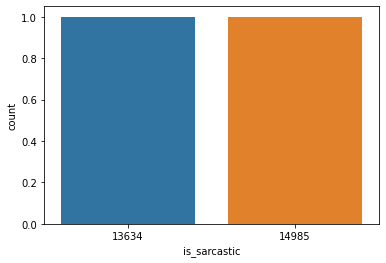

In [10]:


sns.countplot(df['is_sarcastic'].value_counts())



In [20]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import spacy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tause\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [23]:
nlp = spacy.load('en_core_web_sm')
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha() and lemma not in stopwords.words('english')]
    lemmatized_text = ' '.join(a_lemmas)
    return lemmatized_text

In [25]:
cleaned_text = []
for text in df.headline:
    cleaned_text.append(preprocess(text))
df['clean_text'] = cleaned_text

In [26]:
df.head()

,is_sarcastic,headline,clean_text
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomethe scientist unveil doomsday clock ...
1,0,dem rep. totally nails why congress is falling...,dem rep totally nail congress fall short gende...
2,0,eat your veggies: 9 deliciously different recipes,eat veggie deliciously different recipe
3,1,inclement weather prevents liar from getting t...,inclement weather prevent liar get work
4,1,mother comes pretty close to using word 'strea...,mother come pretty close use word streaming co...


In [27]:
from wordcloud import WordCloud
plt.figure(figsize = (20,10))
wc = WordCloud(width = 1500,height = 1000,max_words = 1000).generate(' '.join(word for word in df.clean_text))
plt.axis("off")
plt.title('Wordcloud')
plt.imshow(wc , interpolation = 'bilinear')

ModuleNotFoundError: No module named 'wordcloud'

In [28]:
X = df.clean_text
y = df.is_sarcastic

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [32]:
tfidf = TfidfVectorizer(ngram_range = (1,3))
X_tfidf_train = tfidf.fit_transform(X_train.tolist())
X_tfidf_test = tfidf.transform(X_test.tolist())

In [33]:
X_train.head()

12170    american express offer month paternity materni...
28552        watch dolphin knock stand paddleboarder board
6883                          man enjoy thing inform wrong
28387    jonathan lipnicki star young dark helmet space...
12932    publicist worry kanye west support trump damag...
Name: clean_text, dtype: object

#LOGISTIC REGRESSION


In [35]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_tfidf_train,y_train)

LogisticRegression(class_weight='balanced')

In [36]:
y_pred_lr = lr.predict(X_tfidf_test)
print_metrices(y_pred_lr,y_test)

[[3452 1003]
 [ 982 3149]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      4455
           1       0.76      0.76      0.76      4131

    accuracy                           0.77      8586
   macro avg       0.77      0.77      0.77      8586
weighted avg       0.77      0.77      0.77      8586

Accuracy :  0.768809690193338
Precison :  0.7687789348367672
Recall :  0.768809690193338
F1 :  0.7687897104004202


Naive Bayes

In [38]:
clf_nb = MultinomialNB()
clf_nb.fit(X_tfidf_train,y_train)
y_pred_nb = clf_nb.predict(X_tfidf_test)
print_metrices(y_pred_nb,y_test)

[[3855  600]
 [1251 2880]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      4455
           1       0.83      0.70      0.76      4131

    accuracy                           0.78      8586
   macro avg       0.79      0.78      0.78      8586
weighted avg       0.79      0.78      0.78      8586

Accuracy :  0.7844164919636618
Precison :  0.7971659705535645
Recall :  0.7844164919636618
F1 :  0.7862969173200055


Linear SVC

In [40]:
from sklearn.svm import LinearSVC
svc =  LinearSVC(C= 10,random_state=42,class_weight='balanced')
svc.fit(X_tfidf_train,y_train)
y_pred_svc = svc.predict(X_tfidf_test)
print_metrices(y_pred_svc,y_test)

[[3563  892]
 [ 904 3227]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4455
           1       0.78      0.78      0.78      4131

    accuracy                           0.79      8586
   macro avg       0.79      0.79      0.79      8586
weighted avg       0.79      0.79      0.79      8586

Accuracy :  0.7908222688096902
Precison :  0.7908482768396079
Recall :  0.7908222688096902
F1 :  0.7908337270995445


Decision Tree

In [42]:
clf_dt = DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=6, random_state=42)
clf_dt.fit(X_tfidf_train, y_train)
y_pred_dt = clf_dt.predict(X_tfidf_test)
print_metrices(y_pred_dt,y_test)

[[4295  160]
 [3312  819]]
              precision    recall  f1-score   support

           0       0.56      0.96      0.71      4455
           1       0.84      0.20      0.32      4131

    accuracy                           0.60      8586
   macro avg       0.70      0.58      0.52      8586
weighted avg       0.70      0.60      0.52      8586

Accuracy :  0.5956207780107151
Precison :  0.8767633984836636
Recall :  0.5956207780107151
F1 :  0.6675018565219158


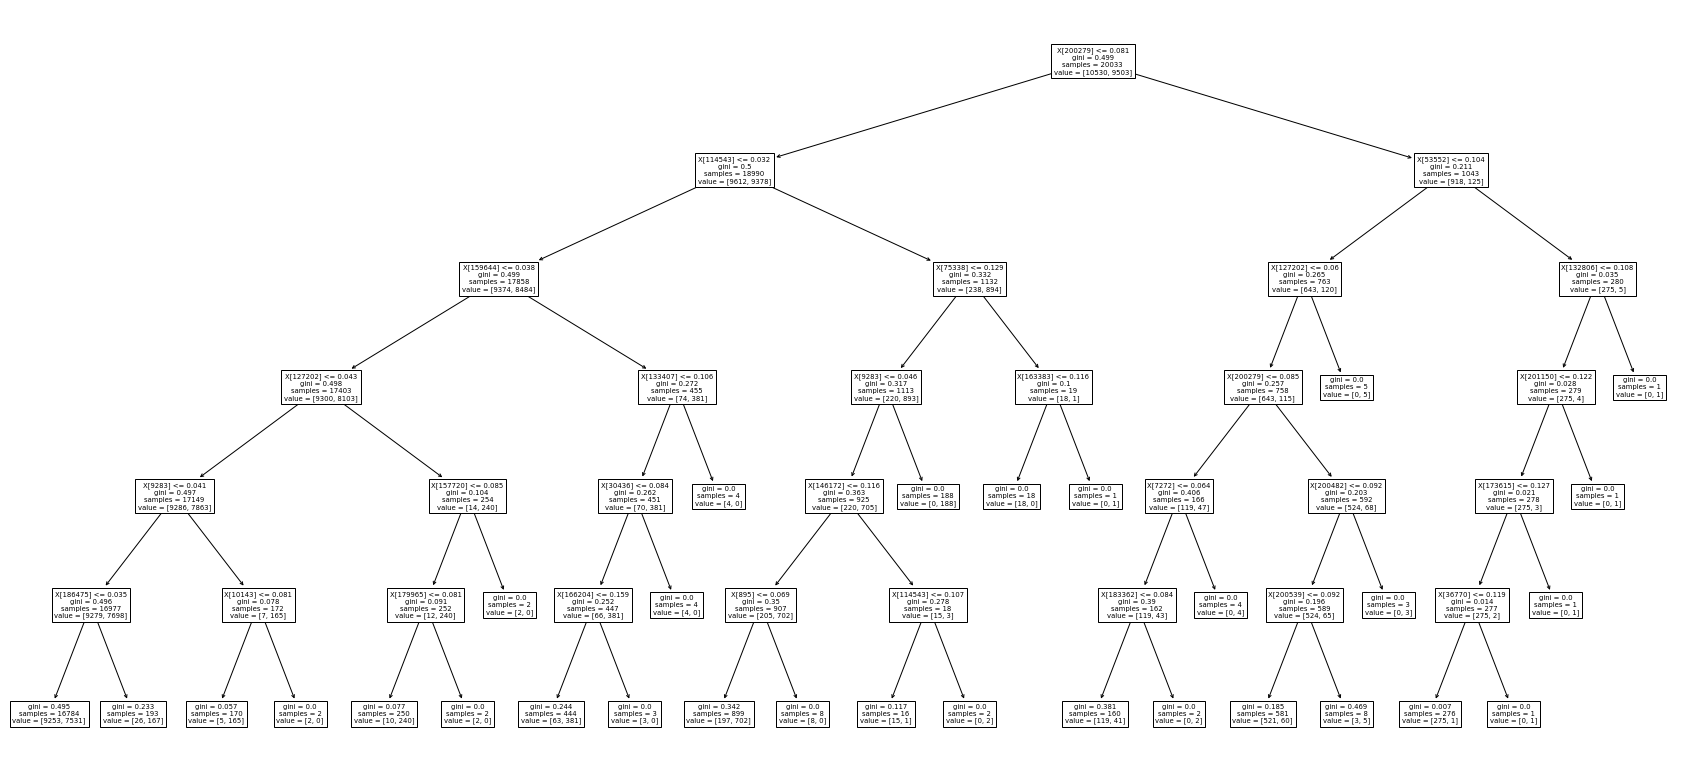

In [43]:
from sklearn import tree
plt.figure(figsize = (30,14))
tree.plot_tree(clf_dt)
plt.show()

ENSEMBLE APPROACH

In [45]:
clf_lr = LogisticRegression(class_weight='balanced')
clf_dt = DecisionTreeClassifier(class_weight='balanced')
clf_rf =   RandomForestClassifier(class_weight='balanced')
clf_svc = SVC(class_weight='balanced')


voting_clf = VotingClassifier(estimators=[('SVC', clf_svc), ('DecisionTree', clf_dt), ('LogReg', clf_lr),('RandromForest', clf_rf)], voting='hard')
voting_clf.fit(X_tfidf_train, y_train)
y_pred_ensemble = voting_clf.predict(X_tfidf_test)

In [46]:
print_metrices(y_pred_ensemble,y_test)

[[3941  514]
 [1755 2376]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.78      4455
           1       0.82      0.58      0.68      4131

    accuracy                           0.74      8586
   macro avg       0.76      0.73      0.73      8586
weighted avg       0.75      0.74      0.73      8586

Accuracy :  0.7357325879338458
Precison :  0.7804612891343228
Recall :  0.7357325879338458
F1 :  0.7429340708425295


COMBINED RESULTS

In [48]:
acc_table = {
    'Logistic Regression' : accuracy_score(y_pred_lr,y_test),
    'LinearSVC' : accuracy_score(y_pred_svc,y_test),
    'Decision Tree' : accuracy_score(y_pred_dt,y_test),
    'Naive Bayes' : accuracy_score(y_pred_nb,y_test),
    'Ensemble ': accuracy_score(y_pred_ensemble,y_test),
}

In [49]:
acc_df = pd.DataFrame(acc_table.items(),columns = ['Model','Accuracy'])

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

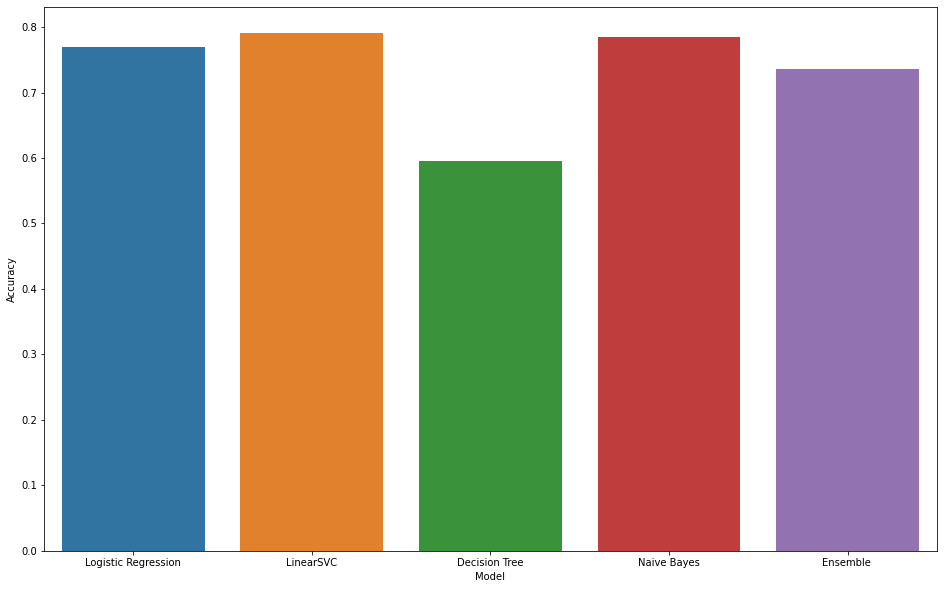

In [50]:
# fig, ax = plt.subplots()
plt.figure(figsize = (16,10))
sns.barplot(x=acc_df['Model'], y=acc_df['Accuracy'], data=acc_df)

# RNN

In [52]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [53]:
max_words = 1000
max_len = 100
tokenizer = Tokenizer(num_words = max_words,oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded_sequences = pad_sequences(train_sequences,maxlen = max_len,padding = 'post')

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(test_sequences,maxlen = max_len,padding = 'post')

In [54]:
print(train_sequences[0])
print(train_padded_sequences[0])

[51, 1, 240, 151, 1, 1, 78]
[ 51   1 240 151   1   1  78   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [55]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,GlobalAveragePooling1D
from keras.models import Model
from keras.models import Sequential

In [56]:
import numpy as np
training_padded = np.array(train_padded_sequences)
training_labels = np.array(y_train)
testing_padded = np.array(test_padded_sequences)
testing_labels = np.array(y_test)

In [57]:
vocab_size = 10000
embedding_dim = 16

In [58]:
Model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [62]:
num_epochs = 30
history = Model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
627/627 - 1s - loss: 0.4636 - accuracy: 0.7741 - val_loss: 0.5158 - val_accuracy: 0.7448 - 1s/epoch - 2ms/step
Epoch 2/30
627/627 - 1s - loss: 0.4619 - accuracy: 0.7746 - val_loss: 0.5281 - val_accuracy: 0.7306 - 1s/epoch - 2ms/step
Epoch 3/30
627/627 - 1s - loss: 0.4614 - accuracy: 0.7760 - val_loss: 0.5313 - val_accuracy: 0.7266 - 1s/epoch - 2ms/step
Epoch 4/30
627/627 - 1s - loss: 0.4607 - accuracy: 0.7769 - val_loss: 0.5144 - val_accuracy: 0.7363 - 1s/epoch - 2ms/step
Epoch 5/30
627/627 - 1s - loss: 0.4622 - accuracy: 0.7726 - val_loss: 0.5263 - val_accuracy: 0.7404 - 1s/epoch - 2ms/step
Epoch 6/30
627/627 - 1s - loss: 0.4596 - accuracy: 0.7770 - val_loss: 0.5186 - val_accuracy: 0.7440 - 1s/epoch - 2ms/step
Epoch 7/30
627/627 - 1s - loss: 0.4607 - accuracy: 0.7757 - val_loss: 0.5186 - val_accuracy: 0.7439 - 1s/epoch - 2ms/step
Epoch 8/30
627/627 - 1s - loss: 0.4593 - accuracy: 0.7738 - val_loss: 0.5148 - val_accuracy: 0.7412 - 1s/epoch - 2ms/step
Epoch 9/30
627/627 - 1s 

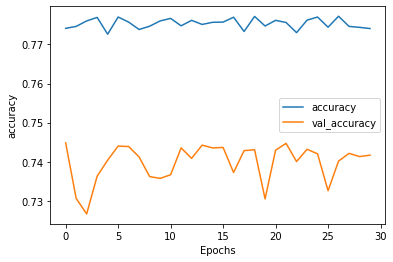

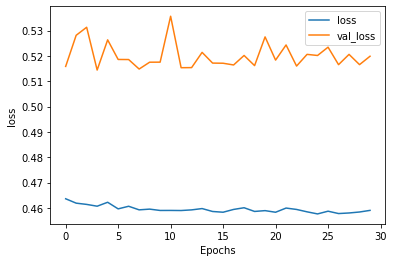

In [63]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")